# MNIST using PyTorch

### Loading MNIST Dataset

In [34]:
import torch
import torchvision

from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)

In [22]:
print(len(trainset))

938


### Understanding Dataset

In [23]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [24]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [25]:
total = 0
counter = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter[int(y)] += 1
        total += 1

print(counter)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [26]:
for i in counter:
    print(f"{i}: {counter[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


### Building Our Neural Network

In [27]:
import torch.nn as nn
import torch.nn.functional as F

ip = 28*28
op = 10

In [28]:
class NET(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(ip, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, op)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

In [29]:
model = NET()
print(model)

NET(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [30]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=0.001)

EPOCH = 3

for epoch in range(EPOCH):
    for data in trainset:
        X, y = data
        model.zero_grad()
        output = model(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.3827, grad_fn=<NllLossBackward0>)
tensor(0.1089, grad_fn=<NllLossBackward0>)
tensor(0.1156, grad_fn=<NllLossBackward0>)


In [31]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = model(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("accuracy", round(correct/total,3))

accuracy 0.964


### Testing Our Model

<function matplotlib.pyplot.show(close=None, block=None)>

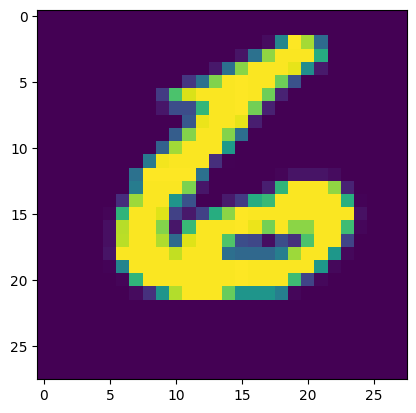

In [32]:
import matplotlib.pyplot as plt

plt.imshow(X[15].view(28,28))
plt.show

In [33]:
print(torch.argmax(model(X[15].view(-1,784))[0]))

tensor(6)
